In [ ]:
import pandas as pd
import numpy as np
import random as rd
from sklearn.decomposition import PCA
from sklearn import preprocessing #scale
import matplotlib.pyplot as plt

# Data Generation Code

Ingin membangkitkan data 100 variabel dengan 2 karakteristik yang berbeda sebagai index: "wt" dan "ko".

wt: Wild Type DNA

ko: Knock Out DNA


In [ ]:
genes = ['gene' + str(i) for i in range(1,101)]
genes[:3]

['gene1', 'gene2', 'gene3']

wt= wild type samples


ko= knock out samples

wt dan ko dibangkitkan dari populasi yang berbeda

In [ ]:
wt = ['wt' + str(i) for i in range(1,11)]
ko = ['ko' + str(i) for i in range(1,11)]
wt[:3]

['wt1', 'wt2', 'wt3']

In [ ]:
data = pd.DataFrame(columns=[*wt, *ko], index=genes)
data.head()

,wt1,wt2,wt3,wt4,wt5,wt6,wt7,wt8,wt9,wt10,ko1,ko2,ko3,ko4,ko5,ko6,ko7,ko8,ko9,ko10
gene1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
for gene in data.index:
    data.loc[gene,'wt1':'wt10'] = np.random.poisson(lam=rd.randrange(5000,10000), size=10)
    data.loc[gene,'ko1':'ko10'] = np.random.poisson(lam=rd.randrange(1,5000), size=10)

In [ ]:
print(data.head())

         wt1   wt2    wt3    wt4   wt5   wt6    wt7   wt8   wt9  wt10   ko1  \
gene1   8743  8708   8775   8748  8800  8618   8816  8792  8699  8776  2033   
gene2   8883  8946   8750   8723  8893  8947   8982  9033  8958  8864  2995   
gene3   9843  9841   9725   9777  9888  9763  10039  9755  9839  9897  4014   
gene4  10009  9870  10065  10074  9917  9904   9810  9860  9851  9954  1137   
gene5   7128  7149   7142   7257  7237  7164   7196  7200  7124  7259   681   

        ko2   ko3   ko4   ko5   ko6   ko7   ko8   ko9  ko10  
gene1  2038  2092  2170  2114  2158  2106  2121  2111  2097  
gene2  3201  3097  3157  3001  3022  3085  3070  3161  3016  
gene3  4098  4091  4125  4152  4062  4095  4114  4097  4101  
gene4  1153  1123  1118  1074  1029  1131  1166  1076  1130  
gene5   667   694   701   673   639   657   714   669   710  


In [ ]:
print(data.shape)

(20, 100)


In [ ]:
data=data.T
data

,gene1,gene2,gene3,gene4,gene5,gene6,gene7,gene8,gene9,gene10,...,gene91,gene92,gene93,gene94,gene95,gene96,gene97,gene98,gene99,gene100
wt1,8743,8883,9843,10009,7128,8021,6308,9910,9365,5635,...,5187,6892,6172,8793,9742,5461,8345,6435,7490,9156
wt2,8708,8946,9841,9870,7149,7792,6185,9787,9164,5636,...,5076,7044,6194,8826,9796,5513,8438,6370,7551,9424
wt3,8775,8750,9725,10065,7142,7925,6398,9828,9257,5653,...,5214,7044,6222,8710,9648,5480,8474,6326,7595,9261
wt4,8748,8723,9777,10074,7257,7689,6099,9930,9064,5493,...,5209,7044,6176,8699,9697,5490,8455,6169,7545,9221
wt5,8800,8893,9888,9917,7237,7714,6184,10032,9214,5579,...,5305,7011,6227,8807,9768,5389,8490,6335,7539,9300
wt6,8618,8947,9763,9904,7164,7668,6148,9896,9178,5599,...,5302,6917,6216,8674,9656,5405,8354,6327,7617,9256
wt7,8816,8982,10039,9810,7196,7976,6358,9868,9174,5577,...,5240,6892,6187,8758,9673,5444,8486,6380,7336,9256
wt8,8792,9033,9755,9860,7200,7831,6354,9801,9081,5625,...,5265,6858,6157,8863,9706,5593,8465,6331,7520,9316
wt9,8699,8958,9839,9851,7124,7796,6207,9903,9079,5646,...,5263,6851,6223,8678,9651,5465,8543,6165,7452,9114
wt10,8776,8864,9897,9954,7259,7733,6247,9778,9056,5632,...,5243,7008,6228,8823,9767,5604,8393,6385,7550,9276


Data yang dimiliki adalah data dengan 100 fitur (genes) ditunjukkan oleh **KOLOM**. Dan 10 observasi data **BARIS**

# Perform PCA on the data

scale = $\frac{(measure-mean)^2}{n.measurements}$

In [ ]:
# First center and scale the data
scaled_data = preprocessing.scale(data)

In [ ]:
scaled_data

array([[ 0.99853443,  0.9944779 ,  1.00192816, ...,  1.15558556,
         0.98515139,  0.96958035],
       [ 0.98799899,  1.01612836,  1.0012317 , ...,  1.06016755,
         1.01486571,  1.04907238],
       [ 1.00816684,  0.94877137,  0.96083699, ...,  0.99557689,
         1.03629899,  1.00072462],
       ...,
       [-0.99477177, -1.00320682, -0.99308311, ..., -1.36785395,
        -1.01204041, -1.00911874],
       [-0.9977819 , -0.97193393, -0.99900302, ..., -0.81149352,
        -1.04078049, -0.99399152],
       [-1.00199608, -1.02176436, -0.9976101 , ..., -0.91865529,
        -1.00473361, -0.99992376]])

In [ ]:
pca = PCA() # create a PCA object
pca.fit(scaled_data) # do the math
pca_data = pca.transform(scaled_data) # get PCA coordinates for scaled_data

# Draw a scree plot and a PCA plot

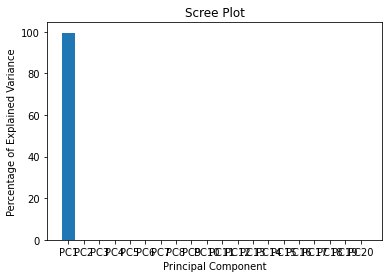

In [ ]:
#The following code constructs the Scree plot
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

In [ ]:
np.round(pca.explained_variance_ratio_* 100, decimals=1)

array([99.6,  0.1,  0.1,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ])

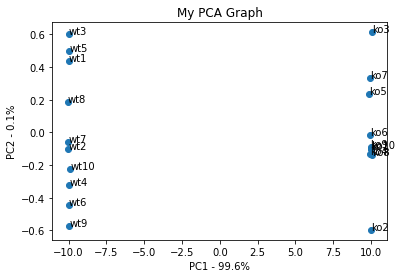

In [ ]:

#the following code makes a fancy looking plot using PC1 and PC2
pca_df = pd.DataFrame(pca_data, index=[*wt, *ko], columns=labels)

plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('My PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))

for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))

plt.show()

**Insight**



*   Secara umum data terdiri atas 2 cluster yaitu ko dan wt
*   Semakin jauh jarak titik observasi semakin jauh karakteristiknya
*   Nilai informasi yang ditangkap oleh visualisi diatas PC 1 sebesar 98.3%






# Determine which genes had the biggest influence on PC1

In [ ]:
## get the name of the top 10 measurements (genes) that contribute
## most to pc1.
## first, get the loading scores
loading_scores = pd.Series(pca.components_[0], index=genes)
loading_scores

gene1     -0.100170
gene2     -0.100142
gene3     -0.100154
gene4     -0.100164
gene5     -0.100170
             ...   
gene96    -0.099863
gene97    -0.100125
gene98    -0.099228
gene99    -0.100128
gene100   -0.100164
Length: 100, dtype: float64

Loading score menunjukkan nilai korelasi fitur terhadap PC, semakin besar loading score semakin memberi kontribusi yang besar terhadap PC

In [ ]:
## now sort the loading scores based on their magnitude (besar ke kecil)
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
sorted_loading_scores

gene47    0.100174
gene78    0.100173
gene28    0.100172
gene44    0.100172
gene70    0.100171
            ...   
gene81    0.099086
gene25    0.098955
gene17    0.098613
gene67    0.097967
gene88    0.095535
Length: 100, dtype: float64

In [ ]:
# get the names of the top 10 genes
top_20_genes = sorted_loading_scores[0:20].index.values

In [ ]:
## print the gene names and their scores (and +/- sign)
print(loading_scores[top_20_genes])

gene47    -0.100174
gene78    -0.100173
gene28    -0.100172
gene44    -0.100172
gene70    -0.100171
gene23    -0.100171
gene52    -0.100171
gene55    -0.100170
gene1     -0.100170
gene5     -0.100170
gene56    -0.100169
gene62    -0.100169
gene32    -0.100169
gene8     -0.100165
gene93    -0.100165
gene71    -0.100165
gene49    -0.100165
gene100   -0.100164
gene4     -0.100164
gene20    -0.100164
dtype: float64


10 variabel yang memberikan impact tertinggi pada PC10 variabel yang memberikan impact tertinggi pada PC

PCA bagian dari Unsupervised Learning

PCA dapat Melihat karakteristik data high dimensi



# Hasil yang diperoleh sesudah modifikasi
##Perubahan yang dilakukan pada code:
Menambahkan Kolom WT dan KO menjadi masing- masing 10 kolom. Mengubah range nilai dari Wt menjadi 5000-10000 , dan range nilai KO menjadi 1 - 5000. Mengambil nilai top 20 genes



##Perbandingan hasil:
Perubahan nilai pada kolom. Menghasilkan nilai PCA yang lebi besar, dari 98,3 % menjadi 99,6%. Ditampilkan top 20 variabel yang memberikan impact tertinggi pada PC10 variabel yang memberikan impact tertinggi pada PC. Semakin banyak klaster wt atau wo dan semkain besar nilai random range, maka menghasilkan nilai pca yang lebih besar.